<h1>Does Education Attainment Status affect COVID-19 Cases and Deaths?</h1>

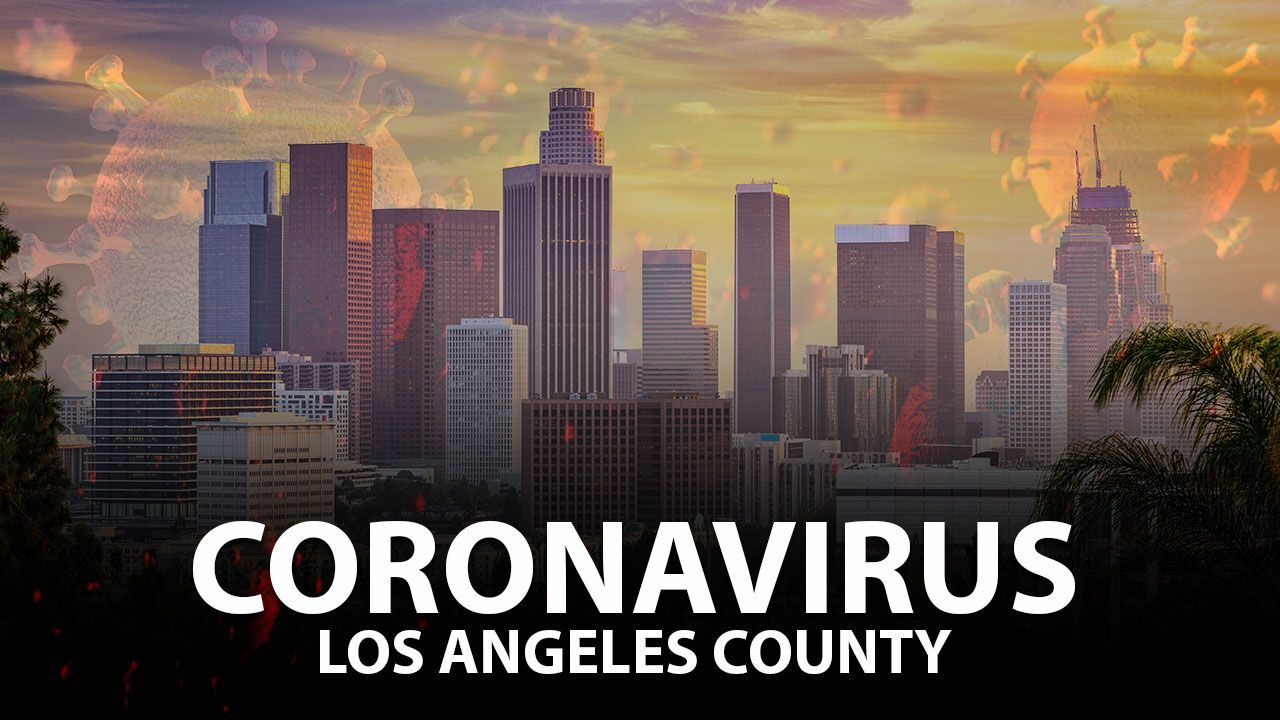

By Dr. F.Chang, DO, MMM


In the city of Los Angeles, the COVID-19 pandemic has been very concerning as it was listed as the epicenter of COVID of the world (1). As misinformation continued to spread, the city was inundated with COVID-19 cases. Although there has been some suggestion of literacy levels playing a factor, no specific studies have been performed in Los Angeles (2). We hypothesize that education level also plays a factor in Los Angeles’s pandemic struggles. However, it is unclear how healthy literacy plays 



We will first create a map of  the current COVID cases in Los Angeles County. We will apply a heatmap and also plot the deaths to demonstrate the density of the cases. We will then examine if income and education level play a role in the spread of COVID-19. We will plan to use Pearson's test to determine if there is any correlation with these factors.


In [666]:
##Import
import pandas as pd
import numpy as pd
import json
import pip
from geopy.geocoders import Nominatim 
from opencage.geocoder import OpenCageGeocode
from pprint import pprint
import matplotlib.cm as cm
import matplotlib.colors as colors
from pandas.io.json import json_normalize
import folium
import requests
import urllib.request
import csv
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt  
%matplotlib inline 
print('Libraries imported.')

Libraries imported.


<h2> Data Acquistion </h2>

<h3> Data Uploading </h3>

Cases per City in LA County

In [590]:
### Grab COVID Data
url = 'http://publichealth.lacounty.gov/media/coronavirus/locations.htm#top-25'
response = requests.get(url)

soup = BeautifulSoup(response.text,"html.parser")
##Input the table you want to scrape
table = soup.findAll('table',{"class":"overflow-y"})[0]
values =[]
# CHOOSE HOW MANY ROWS
tr = table.findAll(['tr'])[1:225]
csvFile = open("cases.csv",'wt',newline='',encoding='utf-8')
writer = csv.writer(csvFile)  
try:   
        for cell in tr:
            th = cell.find_all('th')
            th_data = [col.text.strip('\n') for col in th]
            td = cell.find_all('td')
            row = [i.text.replace('\n','') for i in td]
            writer.writerow(th_data+row)      
        
finally:   
    csvFile.close()

In [208]:
##Input Code Hider
from IPython.display import HTML
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
Click here to <a href="javascript:code_toggle()">Hide</a> the input coding.''')

Code has now been obtained. Reload into Pandas and Clean Up Dataset below:

In [67]:
import pandas as pd
df.cases= pd.read_csv("cases.csv", header=None)
##Rename Columns
df.cases.columns = ['Name', 'Cases', 'Case Rate', 'Death', 'Death Rate']
## Strip City of, Strip Los Angeles - 
df.cases['Name'] = df.cases['Name'].str.replace(r'City of', '')
df.cases['Name'] = df.cases['Name'].str.replace(r'Los Angeles -', '')
df.cases['Name'] = df.cases['Name'].str.replace(r'*', '')
df.cases['Name'] = df.cases['Name'].str.replace(r'/Cove', '')
df.cases['Name'] = df.cases['Name'].str.replace(r'/Cochran', '')
df.cases.head(50)

,Name,Cases,Case Rate,Death,Death Rate
0,Agoura Hills,797,3817,11,53
1,Alhambra,5722,6598,108,125
2,Arcadia,2199,3808,75,130
3,Artesia,1683,10021,35,208
4,Avalon,9,233,0,0
5,Azusa,5349,10689,73,146
6,Baldwin Park,11372,14813,186,242
7,Bell,5723,15752,77,212
8,Bell Gardens,7158,16619,61,142
9,Bellflower,9083,11685,110,142


In [591]:
print("Check Row, Column")
df.cases.shape

Check Row, Column


(224, 5)

<h2> Describe Data Set of Cases and Deaths in Los Angeles</h2>

In [592]:
##Drop the Rates and Describe cases
drop_these = ['Case Rate', 'Death Rate']
cases_final = df.cases.drop(columns=drop_these)
cases_final.describe()


,Cases,Death
count,224.000000,224.000000
mean,5643.504464,80.700893
std,28147.882940,399.210268
min,5.000000,0.000000
25%,761.000000,8.000000
50%,2164.500000,35.000000
75%,5523.500000,75.000000
max,420111.000000,5960.000000


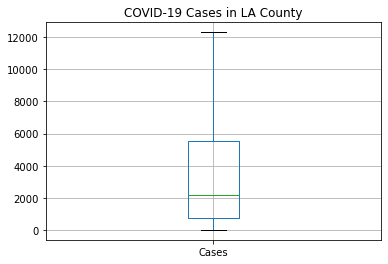

In [593]:
cases_final.boxplot(column=['Cases'], showfliers=False)
plt.title('COVID-19 Cases in LA County')
plt.show()

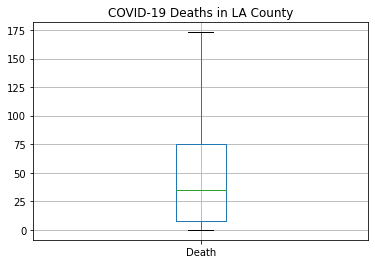

In [594]:
cases_final.boxplot(column=['Death'], showfliers=False)
plt.title('COVID-19 Deaths in LA County')
plt.show()

<h2> Long/Lat Acquisition </h2>

We will use Nominatim to obtain Coordinates for Plotting.

In [595]:
## Add CA to the Location to help with specificity of Geo Search
z = cases_final[['Name','Cases','Death']].copy()
z['Name'] = z['Name'].str.strip()
z['Name'] = z['Name'].astype(str) +', CA' 

In [596]:
## Drop locations that Geocoder can't fetch correctly
z = z.drop(index=[98,99,102,104,108,110,111,112,121,123,127,129,137,149,151,156,159,160,161,162,167,176,179,183,185,186,195,196,197,209,210,212,216,222])
##Sanity Check
z.tail(10)

,Name,Cases,Death
211,"Watts, CA",6444,65
213,"West Adams, CA",3381,100
214,"West Hills, CA",2410,71
215,"West Los Angeles, CA",1889,28
217,"Westchester, CA",1853,31
218,"Westlake, CA",6624,199
219,"Westwood, CA",2019,18
220,"Wholesale District, CA",5512,71
221,"Wilmington, CA",6838,49
223,"Winnetka, CA",5624,49


In [597]:
print("Check Row, Column")
z.shape

Check Row, Column


(190, 3)

In [648]:
##Check if Nominatim works or not
address='Hawaiian Gardens, CA'
geolocator = Nominatim(user_agent="Your_Name")
location = geolocator.geocode(address)
print("Testing System:")
print(location.address)
print((location.latitude, location.longitude))

Testing System:
Hawaiian Gardens, Los Angeles County, California, United States
(33.8284787, -118.0743137)


In [600]:
## Code Long/Lat and Add to Table
geolocator = Nominatim(user_agent="Fw")
z['Long'] = z['Name'].apply(geolocator.geocode).apply(lambda x: x.longitude)
z['Lat'] = z['Name'].apply(geolocator.geocode).apply(lambda x: x.latitude)
z

,Name,Cases,Death,Long,Lat
0,"Agoura Hills, CA",797,11,-118.765704,34.147910
1,"Alhambra, CA",5722,108,-118.127060,34.093042
2,"Arcadia, CA",2199,75,-118.040150,34.136207
3,"Artesia, CA",1683,35,-118.079620,33.869020
4,"Avalon, CA",9,0,-118.327261,33.342210
...,...,...,...,...,...
218,"Westlake, CA",6624,199,-118.272820,34.062923
219,"Westwood, CA",2019,18,-118.430635,34.056121
220,"Wholesale District, CA",5512,71,-118.235434,34.036575
221,"Wilmington, CA",6838,49,-118.262509,33.780016


In [647]:
##Create Marker Size to help with Death Markers
locsize = z[['Name','Cases','Death','Lat','Long']].copy()
locsize['size']=locsize['Death'].apply(lambda count:12 if count>=200 else
                                         8 if count>=150 and count<200 else
                                         4 if count>=75 and count<150 else
                                         1 if count>=25 and count<75 else
                                         0.1)
locsize

,Name,Cases,Death,Lat,Long,size
0,"Agoura Hills, CA",797,11,34.147910,-118.765704,0.1
1,"Alhambra, CA",5722,108,34.093042,-118.127060,4.0
2,"Arcadia, CA",2199,75,34.136207,-118.040150,4.0
3,"Artesia, CA",1683,35,33.869020,-118.079620,1.0
4,"Avalon, CA",9,0,33.342210,-118.327261,0.1
...,...,...,...,...,...,...
218,"Westlake, CA",6624,199,34.062923,-118.272820,8.0
219,"Westwood, CA",2019,18,34.056121,-118.430635,0.1
220,"Wholesale District, CA",5512,71,34.036575,-118.235434,1.0
221,"Wilmington, CA",6838,49,33.780016,-118.262509,1.0


In [663]:
## Create Map/HeatMap
from folium.plugins import HeatMap
LaCovid = folium.Map(location=[34, -118.2], zoom_start=9.7)
HeatMap(data=locsize[['Lat', 'Long', 'Cases']].groupby(['Lat', 'Long']).sum().reset_index().values.tolist(), radius=20, blur=15, max_val=45).add_to(LaCovid)
##Create Markers
z_d = folium.map.FeatureGroup()
for Lat, Long, Size in zip(locsize['Lat'],locsize['Long'], locsize['size']):
    ## locsize.Lat, locsize.Long, locsize.size
    z_d.add_child(
        folium.features.CircleMarker(
            [Lat, Long],
            name='Deaths',
            radius=Size, # define how big you want the circle markers to be
            color='black',
            fill=True,
            fill_color='black',
            fill_opacity=0.3
        )
    )

In [627]:
##TIMESTAMP
url_timestamp = 'http://publichealth.lacounty.gov/media/coronavirus/locations.htm#top-25'
tsresponse = requests.get(url_timestamp)
tssoup = BeautifulSoup(tsresponse.text,"html.parser")
timestamp = tssoup.find('div', attrs={"class":"container-xl pb-4"})
timestamp2=tssoup.find('small', class_= "text-muted")
timestampstring=timestamp2.text[5:23]

<h2>"COVID-19 Cases Heat Map in Los Angeles County"</h2>

In [665]:
LaCovid
LaCovid.add_child(z_d)

In [207]:
print("According to LA County, last updated:")
print(timestampstring)

According to LA County, last updated:
 6:00pm 01/19/2021


Based on the mapping, we can see a heatmap of Los Angeles County in regards to cases. The more red an area is noted, the more cases we have noted in that area. We also see black circles that represent deaths in Los Angeles County. Again, the larger the circles, the more deaths are noted in that geography. Please keep in mind, the data is shown of <i><b>Los Angeles County</b></i> and therefore there was limited data from Long Beach, Orange County, Inland Empire, etc, when interpreting this data.

We can see that there is significant amount of cases in South Los Angeles, Inglewood, Pomona,and San Fernando Valley. We can also see that there are more deaths in these areas as well, which makes sense following high case rates. We will now conduct further correlation studies to see if education status plays a role in COVID.

<h3> Append with other data </h3>

We will now initiate cleaning the other data sets and joining on the final table for the stats analysis.

In [218]:
##Start Append System
cases_final.head()
df.cases.append = cases_final[['Name','Cases','Death']].copy()

In [601]:
##Import Income from LA County

import requests
incomeurl = "http://publichealth.lacounty.gov/ohae/docs/cchp/xlsx/2018/MedianIncome.xlsx"
resp = requests.get(incomeurl)

output = open('income.csv', 'wb')
output.write(resp.content)
output.close()
import pandas as pd
df.income= pd.read_excel("income.csv", header=None)
df.income.head(10)

,0,1,2,3,4
0,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN
4,NaN,City/Community,Estimate,95% Confidence Interval2: Lower Limit,95% Confidence Interval: Upper Limit
5,NaN,Alhambra,53582,50105.4,57058.6
6,NaN,Altadena,86050,81905.3,90194.7
7,NaN,Arcadia,79934,74551.2,85316.8
8,NaN,Azusa,53135,49472,56798
9,NaN,Baldwin Park,51742,49903.9,53580.1


In [557]:
##Cleanse Income Data
df.income.columns = ['Drop', 'Name','Income', 'CI1', 'CI2']
df.income_a = df.income.drop(['Drop','CI1','CI2'], axis=1)

df.income_a = df.income_a.dropna()
df.income_b = df.income_a.reset_index(drop=True)
df.income_c = df.income_b.iloc[1:]
df.income_c.head()

,Name,Income
1,Alhambra,53582
2,Altadena,86050
3,Arcadia,79934
4,Azusa,53135
5,Baldwin Park,51742


In [608]:
##Continue Cleansing and Join
df.cases_append['Name'] = df.cases_append['Name'].str.strip()
pd.options.mode.chained_assignment = None  # default='warn'
df.income_c['Name'] = df.income_c["Name"].str.strip()

In [609]:
c = pd.merge(df.cases_append, df.income_c, how='inner',left_on='Name', right_on = 'Name', sort=False)
c['Name'] =  c['Name'].astype(str) +', CA' 

<h2>Edu Index </h2>

For the education levels, LA County Data was utilized and an Education Index was created by performing a 
LINEST function over the four types of categories (Less Than High School, High School Graduate, Some College, Bachelor Degree or Higher) to obtain a slope value and then normalizing the value to create an educational index.
The education index is described as a value from 0-1, with 0 being very low educational attainment and 1 being very high educational attainment. Data was appropriately examined prior to joining onto the main table.
Credit: Dr. E.C, PhD for examining this table.
Source:http://publichealth.lacounty.gov/ohae/docs/cchp/xlsx/2018/EducAttainment.xlsx

In [610]:
##Import Education from LA County
import pandas as pd
df.edu= pd.read_excel("Education Index.xlsx", header=None)
df.edu.columns = ['Name', 'Edu Index']
df.edu['Name'] =  df.edu['Name'].astype(str) +', CA' 
print("Column, Row check:")
df.edu.shape

Column, Row check:


(88, 2)

In [611]:
##Join on Final Table with Edu Index
df.final = pd.merge(c, df.edu, how='inner',left_on='Name', right_on = 'Name', sort=False)

In [612]:
##Adjust to Float
df.final['Income']=df.final['Income'].astype('float64')
df.final['Edu Index']=df.final['Edu Index'].astype('float64')

In [613]:
##Get Tools
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 


<h2> Statistical Analysis of the Data </h2>

In [614]:
##Call Correlation
df.final.corr()

,Cases,Death,Income,Edu Index
Cases,1.000000,0.794521,-0.499149,-0.371105
Death,0.794521,1.000000,-0.471435,-0.230363
Income,-0.499149,-0.471435,1.000000,0.755002
Edu Index,-0.371105,-0.230363,0.755002,1.000000


(0.0, 398.55)

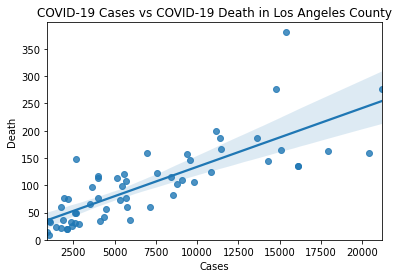

In [615]:
sns.regplot(x="Cases", y="Death", data=df.final).set_title('COVID-19 Cases vs COVID-19 Death in Los Angeles County')
plt.ylim(0,)

(0.0, 22572.493009782258)

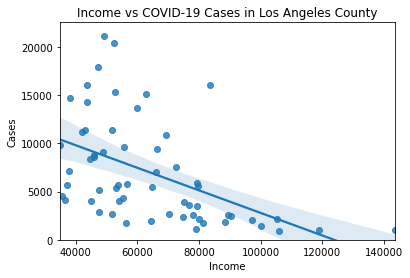

In [616]:
sns.regplot(x="Income", y="Cases", data=df.final).set_title('Income vs COVID-19 Cases in Los Angeles County')
plt.ylim(0,)

(0.0, 402.10108365300323)

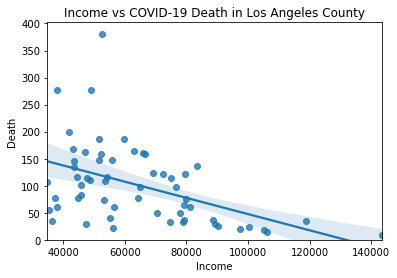

In [617]:
sns.regplot(x="Income", y="Death", data=df.final).set_title('Income vs COVID-19 Death in Los Angeles County')
plt.ylim(0,)

(0.0, 22219.75)

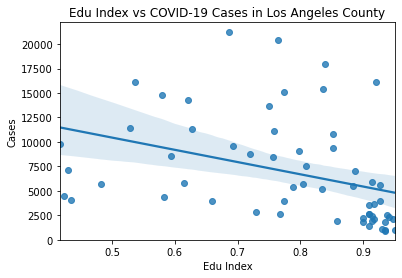

In [618]:
sns.regplot(x="Edu Index", y="Cases", data=df.final).set_title('Edu Index vs COVID-19 Cases in Los Angeles County')
plt.ylim(0,)

(0.0, 398.55)

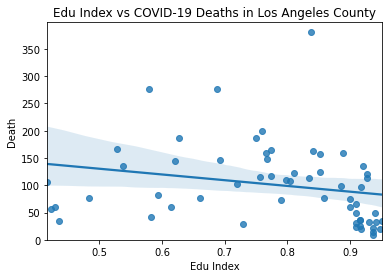

In [619]:
sns.regplot(x="Edu Index", y="Death", data=df.final).set_title('Edu Index vs COVID-19 Deaths in Los Angeles County')
plt.ylim(0,)

In [620]:
from scipy import stats
pearson_coef, p_value = stats.pearsonr(df.final['Death'], df.final['Cases'])
print("Death vs Cases:")
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

Death vs Cases:
The Pearson Correlation Coefficient is 0.7945209080966835  with a P-value of P = 5.877617806942353e-14


In [621]:
pearson_coef, p_value = stats.pearsonr(df.final['Edu Index'], df.final['Cases'])
print("Edu Index vs Cases:")
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 

Edu Index vs Cases:
The Pearson Correlation Coefficient is -0.3711051301253169  with a P-value of P = 0.0038081997012900035


In [622]:
pearson_coef, p_value = stats.pearsonr(df.final['Edu Index'], df.final['Death'])
print("Edu Index vs Death:")
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 

Edu Index vs Death:
The Pearson Correlation Coefficient is -0.2303631565604891  with a P-value of P = 0.07921047297729891


In [623]:
pearson_coef, p_value = stats.pearsonr(df.final['Income'], df.final['Cases'])
print("Income vs Cases:")
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 

Income vs Cases:
The Pearson Correlation Coefficient is -0.49914879561675085  with a P-value of P = 5.717325513385932e-05


In [589]:
pearson_coef, p_value = stats.pearsonr(df.final['Income'], df.final['Death'])
print("Income vs Death:")
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 

Income vs Death:
The Pearson Correlation Coefficient is -0.4714354718298873  with a P-value of P = 0.00016397170721499846


<h2>Summary</h2>

After examining the trends, it appears that Cases and Death are strongtly correlated, as logically expected. There also appears to be some trend towards increasing income causing a decrease in deaths. However, we do not see as strong of a correlation of Education playing a role in causing COVID-19 Cases/Deaths. Our hypothesis was that potentially health literacy may contribute to the increasing cases either due to poor comprehension of the Pandemic and/or clinical provider instructions. In addition, we also hypothesized that potentially misinformation could play a role here. Again, it is very difficult to correlate anything strongly from this study. We, however, do see a better trend in an inverse proportion of income to COVID-19 cases and death. The most likely explanation is tied to essential workers, who tend to be lower wage workers, needing to provide services and therefore, unfortunately being infected during their work. This study helps provide some justification of protecting our essential workers given the higher risk nature of their work. We hope to perform further analysis in other interesting areas such as demographics and smoking status in the future.

References:
    
(1)L.A. County on verge of becoming COVID-19 epicenter - Los Angeles Times (latimes.com)

(2) Paakkari L, Okan O. COVID-19: health literacy is an underestimated problem. Lancet Public Health. 2020;5(5):e249-e250. doi:10.1016/S2468-2667(20)30086-4